In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

import utils

Using TensorFlow backend.


In [2]:
train = pd.read_csv(str(utils.TRAIN_PATH))
test = pd.read_csv(str(utils.TEST_PATH))

In [3]:
train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [4]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [5]:
y_train = train.pop('label')
X_train = train

# normalize
X_train = X_train / 255.0
test = test / 255.0

In [6]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(X_train.shape[0],28,28)
test = test.values.reshape(test.shape[0],28,28)

In [7]:
X_train.shape

(42000, 28, 28)

In [8]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
# # callbacks
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [12]:
history = model.fit(
    X_train, y_train,
    epochs=15,
#     validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/15
42000/42000 [==============================] - 3s 83us/step - loss: 0.0078 - accuracy: 0.9980
Epoch 2/15
42000/42000 [==============================] - 3s 81us/step - loss: 0.0095 - accuracy: 0.9971
Epoch 3/15
42000/42000 [==============================] - 3s 81us/step - loss: 0.0053 - accuracy: 0.9988
Epoch 4/15
42000/42000 [==============================] - 4s 88us/step - loss: 0.0074 - accuracy: 0.9979
Epoch 5/15
42000/42000 [==============================] - 4s 88us/step - loss: 0.0063 - accuracy: 0.9982
Epoch 6/15
42000/42000 [==============================] - 4s 90us/step - loss: 0.0065 - accuracy: 0.9978
Epoch 7/15
42000/42000 [==============================] - 4s 84us/step - loss: 0.0040 - accuracy: 0.9990
Epoch 8/15
42000/42000 [==============================] - 4s 84us/step - loss: 0.0020 - accuracy: 0.9995
Epoch 9/15
42000/42000 [==============================] - 3s 83us/step - loss: 0.0077 - accuracy: 0.9977
Epoch 10/15
42000/42000 [==============================

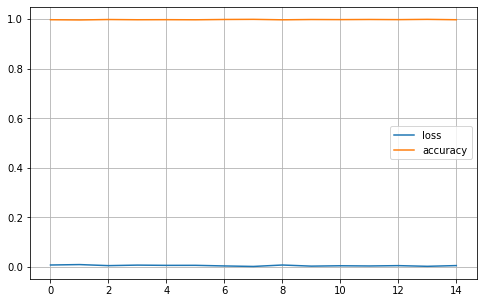

In [13]:
source = pd.DataFrame(history.history)
source.plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [14]:
el = X_train[45]

y_proba = model.predict_classes(el.reshape(1, *el.shape))
y_proba

array([6], dtype=int64)

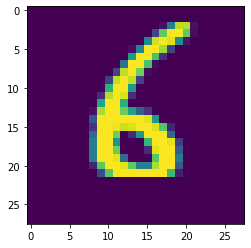

In [15]:
plt.imshow(el.reshape(28,28))

In [16]:
results = model.predict_classes(test)
results = pd.Series(results,name="Label")

In [26]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(results)+1)), "Label": results})
submissions.to_csv("mnist_results.csv", index=False, header=True)